# Problem Statement

Indeed routes leads to the sales team based on the potential quality of each lead.
The system predicts the potential value of each lead and assigns out the leads
from highest to lowest probability until each sales representative has a full sales
book.

The dataset shows leads that were assigned and never assigned to
a sales rep. The purpose of this exercise is to estimate the incremental impact
the sales representatives had on revenue. In other words, how much more did
these leads spend because there was sales intervention?

## Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandasql as ps

## Importing the dataset as a dataframe

In [2]:
#def importingOriginalData():
df_path = r"PS_Homework_data_set.csv"
df = pd.read_csv(df_path)
#importingOriginalData()

## Exploratory Data Analysis(EDA)

### Understanding the variables in the data set.
#### Taking a bird's eye view of how the data looks like

In [3]:
df.head()

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN
4,4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,NaN


In [4]:
df.tail()

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue
77886,77886,11140889,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,2017-02-23,2017-02-23,-22,138,9643000.0
77887,77887,11142171,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2017-02-23,-22,138,NaN
77888,77888,11146603,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2017-02-24,-23,138,NaN
77889,77889,11199601,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2017-02-28,-27,138,NaN
77890,77890,11199632,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2017-02-28,-27,138,NaN


#### Checking the dimension of the original dataset

In [5]:
df.shape

(77891, 10)

Our original dataset has 77891 rows and 9 columns

In [6]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df['revenue'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


#### Null Check: Calculating the null values in each column of the dataframe

In [7]:
df.isna().sum()

Unnamed: 0                    0
advertiser_id                 0
assigned                      0
date_assignment_starts        0
date_assignment_ends          0
first_revenue_date        69458
date_created                  0
age                           0
assign_days                   0
revenue                   74551
dtype: int64

As per the above analysis for finding out the missing values, it has been observed that revenue column has 74551 missing values out of 77891 total rows,
which means that approximately 95.7% values are missing in the revenue column.

#### Possible approaches for missing data in a column:
1. We can drop all the rows with missing values.
Advantage: 
Complete removal of data with missing values results in robust and highly accurate model
Deleting a particular row or a column with no specific information is better, since it does not have a high weightage

Disadvantage:
Loss of information and data
Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset

2. Replacing missing values with Mean/Median/Mode:
Advantage:
This is a better approach when the data size is small but in our case the data is not very small
It can prevent data loss which results in removal of the rows and columns

Disadvantage:
Imputing the approximations and we add variance and bias to the data
Works poorly compared to other multiple-imputations method

3. Predicting The Missing Values
we can predict the nulls with the help of a machine learning regression algorithm. But since applying regression isn't producing good and accurate results, I amd not using this method.

Advantage:
Imputing the missing variable is an improvement as long as the bias from the same is smaller than the omitted variable bias
Yields unbiased estimates of the model parameters

Disadvantage:
Bias also arises when an incomplete conditioning set is used for a categorical variable
Considered only as a proxy for the true values

4. Using Algorithms like KNN

Advantage:
Does not require creation of a predictive model for each attribute with missing data in the dataset
Correlation of the data is neglected

Disadvantage:
Is a very time consuming process and it can be critical in data mining where large databases are being extracted
Choice of distance functions can be Euclidean, Manhattan etc. which is do not yield a robust result

#### Dropping Duplicates rows in the columns (if any)

In [8]:
df.drop_duplicates()
df.shape

(77891, 10)

Since the shape of the data is same as it was before dropping the duplicates, it has been observed that there are no duplicate columns in the dataset 

#### Displaying a list of all the column headers

In [9]:
df.columns

Index(['Unnamed: 0', 'advertiser_id', 'assigned', 'date_assignment_starts',
       'date_assignment_ends', 'first_revenue_date', 'date_created', 'age',
       'assign_days', 'revenue'],
      dtype='object')

#### Displaying the number of unique values in each column

In [10]:
df.nunique()

Unnamed: 0                77891
advertiser_id             77891
assigned                      2
date_assignment_starts        3
date_assignment_ends       6502
first_revenue_date         1636
date_created               2101
age                        2131
assign_days                 141
revenue                    2966
dtype: int64

#### Displaying the data types of all the columns seperately

In [11]:
df.dtypes

Unnamed: 0                  int64
advertiser_id               int64
assigned                    int64
date_assignment_starts     object
date_assignment_ends       object
first_revenue_date         object
date_created               object
age                         int64
assign_days                 int64
revenue                   float64
dtype: object

### Analysing each column

#### 1. Unnamed: 0
dtype = int64

Assumption = After analysing the column 'Unnamed: 0', it seems that it is exactly same as index of the rows so it wouldn't be of much use to perform further analysis.
I feel that we can drop this column from the dataset, as any correlation of 'unnamed' column (if exists) with other columns would be a spurious correlation.
Therefore, dropping this column for reducing noise in the data.

In [12]:
df.drop('Unnamed: 0', axis=1,inplace=True)

#### 2. advertiser_id
dtype = int64

Mostly, IDs are always unqiue but still let's check for any existing duplicate advertiser IDs
#### Checking whether there is more than 1 advertiser id in the column 'advertiser_id'

In [13]:
df['advertiser_id'].nunique()

77891

Since, 77891 is same as the total number of rows in our dataset, we can infer that all the IDs are unique in the 'advertiser_id' column
This would be good to uniquely identify an advertiserment but this won't of much use for further analysis.
Therefore, dropping this column for reducing noise in the data.

In [14]:
df.drop('advertiser_id', axis=1,inplace=True)

#### 3. assigned
dtype = int64

In [15]:
df['assigned'].nunique()

2

Assumption = Treating this as a categorical variable as this shows whether leads were assigned or not assigned to
the sales rep

#### 4. date_assignment_starts
dtype = object

Assumption = This is the date and time when the advertising assignment starts

#### 5. date_assignment_ends
dtype = object

Assumption = This is the date and time when the advertising assignment ends

#### 6. first_revenue_date
dtype = object

Assumption = This is the date when first revenue was collected.
Would take its difference in days with the date_created to use it as an input variable after analysing its correlation.

#### 7. date_created
dtype = object

Assumption = This is the date when advertisement got created

#### 8. age
dtype = int64

Assumption = Age of the advertisement. This also contains negative values, which seems ambiguous. Negative value of age might signfy the age of a lead before advertisement was. I'd treat this as a variable which might contribute towards predicting the revenue and ignore the ambiguity of age being negative.

#### 9. assign_days
dtype = int64

Assumption = Number of days assigned to a lead. This also contains negative values, which seems ambiguous. Negative value of days might signfy the days of a lead before the advertisement. I'd treat this as a variable which might be contributing towards predicting the revenue and ignore the ambiguity of number of assigned days being negative.

#### 9. revenue
dtype = float64

Assumption = Revenue generated by a lead

### Converting the columns containg dates to datetime format 

In [16]:
date_columns = ['date_assignment_starts', 'date_assignment_ends', 'first_revenue_date', 'date_created']

for d in date_columns:
    df[d] = df[d].astype('datetime64[ns]')

In [17]:
df.dtypes

assigned                           int64
date_assignment_starts    datetime64[ns]
date_assignment_ends      datetime64[ns]
first_revenue_date        datetime64[ns]
date_created              datetime64[ns]
age                                int64
assign_days                        int64
revenue                          float64
dtype: object

### Calculating tenure of the assignment by taking differnce between date_assignment_ends and date_assignment_starts. Adding a new column tenure to our df


In [18]:
df['assignment_tenure'] = df['date_assignment_ends']- df['date_assignment_starts']

In [19]:
df.head()

,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,assignment_tenure
0,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2006-07-14,3855,138,NaN,138 days 12:12:37.888680
1,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2006-08-02,3836,138,NaN,138 days 12:12:37.888680
2,1,2017-02-01,2017-04-28 15:36:30.000000,NaT,2006-08-17,3821,86,NaN,86 days 15:36:30
3,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2006-09-12,3795,138,NaN,138 days 12:12:37.888680
4,1,2017-02-01,2017-06-19 12:12:37.888680,NaT,2006-11-02,3744,138,NaN,138 days 12:12:37.888680


Since our new column 'assignment_tenure' is same as assign_days, it can be inferred that we can capture the information the two columns 'date_assignment_starts' and 'date_assignment_ends' through the column assign_days
We can remove the columns 'date_assignment_starts', 'date_assignment_ends' and 'assignment_tenure' from the dataset

In [20]:
df.drop(['date_assignment_starts', 'date_assignment_ends', 'assignment_tenure'], axis=1, inplace=True)

In [21]:
df.head()

,assigned,first_revenue_date,date_created,age,assign_days,revenue
0,1,NaT,2006-07-14,3855,138,NaN
1,1,NaT,2006-08-02,3836,138,NaN
2,1,NaT,2006-08-17,3821,86,NaN
3,1,NaT,2006-09-12,3795,138,NaN
4,1,NaT,2006-11-02,3744,138,NaN


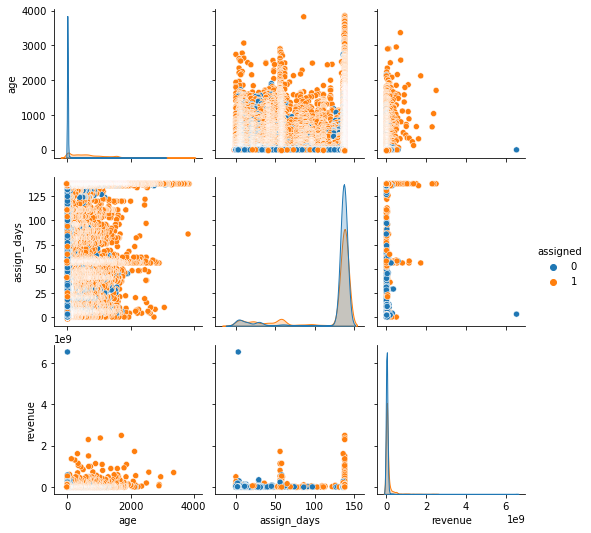

In [22]:
sns.pairplot(df, hue = 'assigned')

### Seperating assigned and unassigned leads

In [23]:
q1 = " SELECT * FROM df WHERE assigned == 0"
unassigned_leads = ps.sqldf(q1, locals())
unassigned_leads.drop('assigned', axis = 1, inplace = True)
unassigned_leads

,first_revenue_date,date_created,age,assign_days,revenue
0,None,2008-08-10 00:00:00.000000,3097,137,NaN
1,None,2009-08-06 00:00:00.000000,2737,136,NaN
2,None,2009-10-21 00:00:00.000000,2660,138,NaN
3,None,2009-11-11 00:00:00.000000,2640,137,NaN
4,None,2009-11-12 00:00:00.000000,2639,137,NaN
...,...,...,...,...,...
40807,None,2017-02-03 00:00:00.000000,0,136,NaN
40808,None,2017-02-03 00:00:00.000000,0,136,NaN
40809,None,2017-02-03 00:00:00.000000,0,136,NaN
40810,None,2017-02-03 00:00:00.000000,0,51,NaN


In [24]:
q1 = " SELECT * FROM df WHERE assigned == 1"
assigned_leads = ps.sqldf(q1, locals())
#assigned_leads.drop('assigned', axis = 1, inplace = True)
assigned_leads

,assigned,first_revenue_date,date_created,age,assign_days,revenue
0,1,None,2006-07-14 00:00:00.000000,3855,138,NaN
1,1,None,2006-08-02 00:00:00.000000,3836,138,NaN
2,1,None,2006-08-17 00:00:00.000000,3821,86,NaN
3,1,None,2006-09-12 00:00:00.000000,3795,138,NaN
4,1,None,2006-11-02 00:00:00.000000,3744,138,NaN
...,...,...,...,...,...,...
37074,1,2017-02-23 00:00:00.000000,2017-02-23 00:00:00.000000,-22,138,9643000.0
37075,1,None,2017-02-23 00:00:00.000000,-22,138,NaN
37076,1,None,2017-02-24 00:00:00.000000,-23,138,NaN
37077,1,None,2017-02-28 00:00:00.000000,-27,138,NaN


<AxesSubplot:>

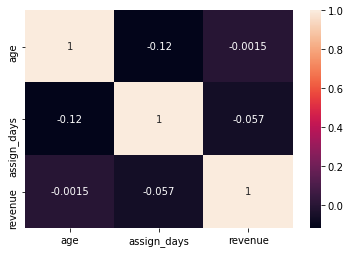

In [25]:
sns.heatmap(unassigned_leads.corr(), annot=True)

#### Distribution of revenue for assigned and unassigned leads

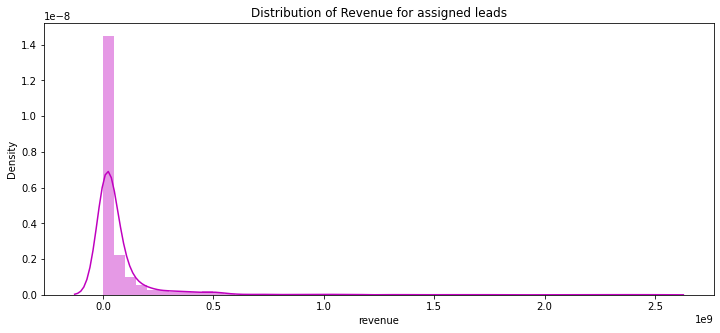

In [26]:
pl.figure(figsize=(12,5))
pl.title("Distribution of Revenue for assigned leads")
ax = sns.distplot(assigned_leads["revenue"], color = 'm')

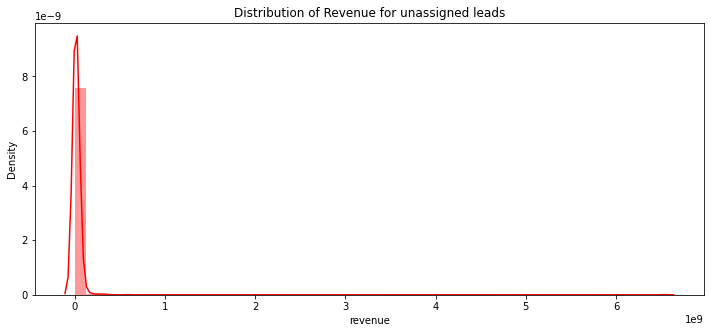

In [27]:
pl.figure(figsize=(12,5))
pl.title("Distribution of Revenue for unassigned leads")
ax = sns.distplot(unassigned_leads["revenue"], color = 'r')

<AxesSubplot:xlabel='assigned', ylabel='revenue'>

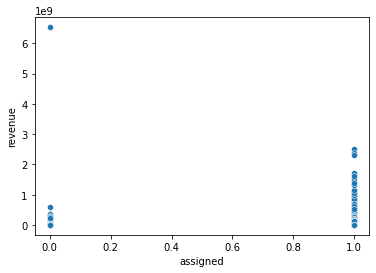

In [28]:
sns.scatterplot(x="assigned", y="revenue", data=df, palette = 'magma')

<AxesSubplot:xlabel='age', ylabel='revenue'>

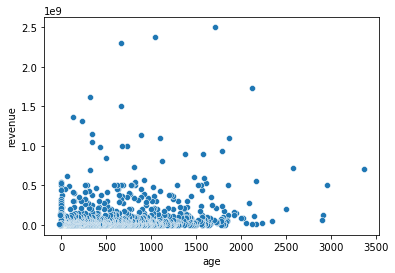

In [29]:
sns.scatterplot(x="age", y="revenue", data=assigned_leads, palette = 'magma')

<AxesSubplot:xlabel='age', ylabel='revenue'>

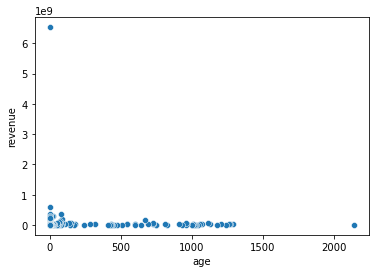

In [30]:
sns.scatterplot(x="age", y="revenue", data=unassigned_leads)

In [31]:
corr_age_revenue = df['age'].corr(df['revenue'])
corr_age_revenue

0.1989130724696291